                                             Heart Disease Prediction

Group Members: 

                1) Zargham Abbas
                2) Mirza Shahzaib Baig
                3) Hassan Munir Ahmed
                4) Shaheer Ahmed Khan


This code gives a comparative analysis on the dataset of Heart Disease predictions acquired from Kaggle.


Methods compared here are: 

1) Logistic Regression
2) Support Vector Machines
3) Decision Tree
4) Random Forest
5) K Nearest Neighbor

Evaluation Metric used here are: 
1) F1 Score 
2) Accuracy 
3) Recall

We start with building a detailed Exploratory Data Analysis (EDA) on this dataset.

In [115]:
#importing all the necessary Llibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import  f1_score, accuracy_score, recall_score
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
print("Set up ready")

Set up ready


In [116]:
#importing the dataset
dataset = pd.read_csv('heart.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [117]:
#printing forst five rows
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


We need to look at the distribtuin of data and check for inconsistensies by calling the below function.

In [118]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


e.g. min of age is not a negatve values which means it is consistent.

In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


dataset.info() is telling us that there is no null value present in the data.

In [120]:
#to check the correlation of variables.
px.imshow(dataset.corr(),title="Correlation Plot of the Heat Failure Prediction")

e.g MaxHR is negatively correlated to HeartDisease.

In [121]:
#to check the ratio of disease in males and females
fig=px.histogram(dataset, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=dataset.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

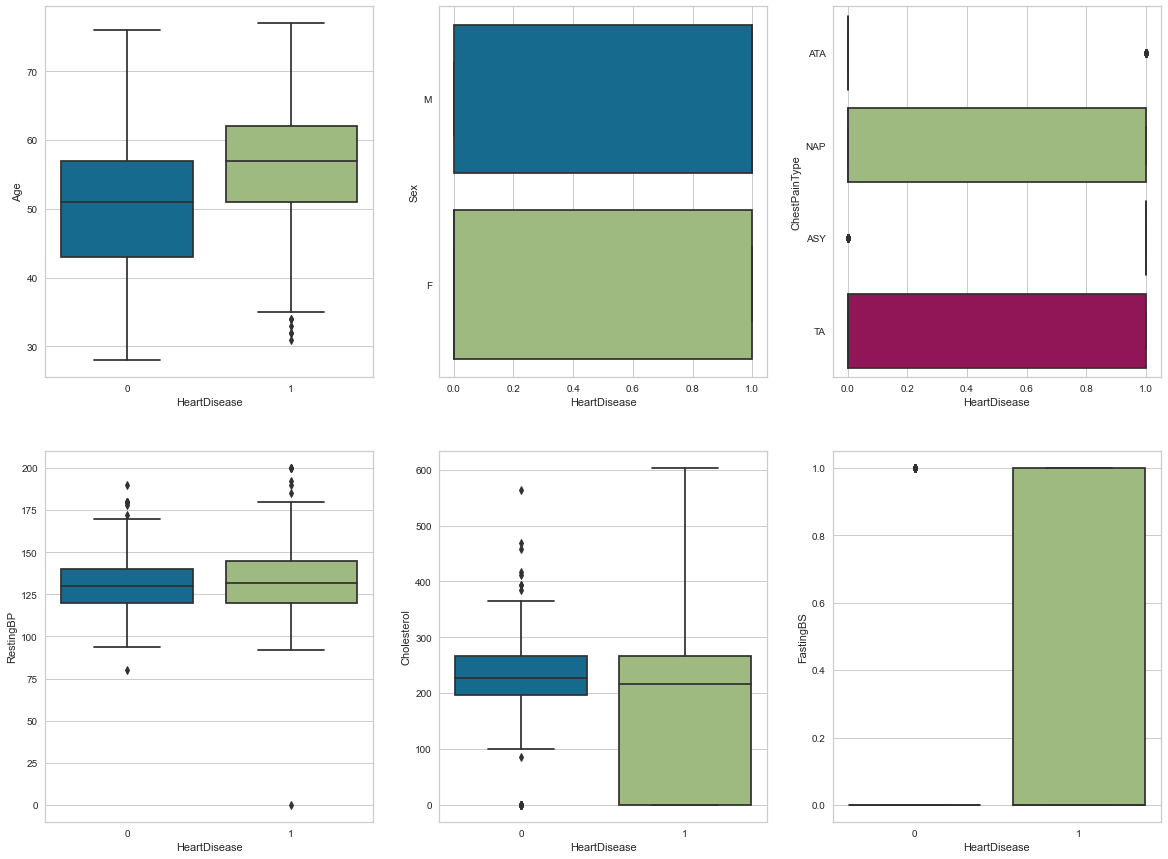

In [122]:
#checking the outleirs in the data
plt.figure(figsize=(20,15))
for i in range(6):
  plt.subplot(2,3, i+1)
  sns.boxplot(data=dataset, x='HeartDisease', y=dataset[dataset.columns[i]])

In [123]:
#3d plot to visualize the information for males and females.
fig = px.scatter_3d(dataset, 
                    x='RestingBP',
                    y='Age',
                    z='Sex',
                    color='HeartDisease')
fig.show()

We need to separate out numerical and categorical data so that our predcition models can perform better.

In [124]:
numerical= dataset.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = dataset.select_dtypes('object').columns

print(f'Numerical Columns:  {dataset[numerical].columns}')
print('\n')
print(f'Categorical Columns: {dataset[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [125]:
#cufflink joins the pandas with plotly to plot the whole dataframe.
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [126]:
dataset[categorical].iplot(kind='hist')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

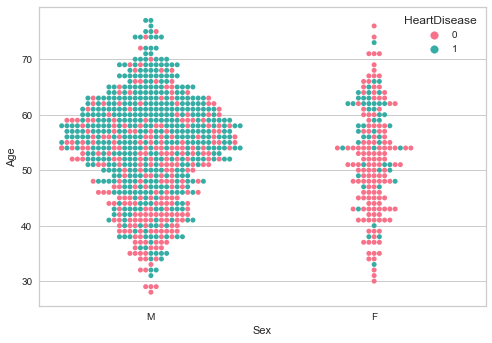

In [127]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=dataset, palette="husl")

C:\Users\zargham abbas\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

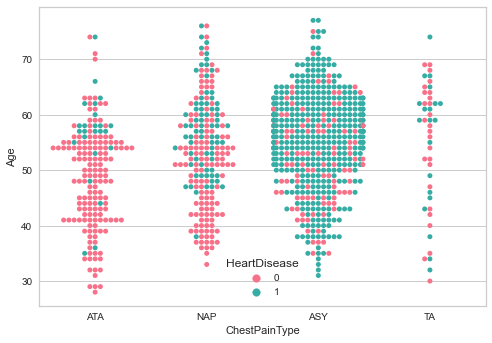

In [128]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=dataset, palette="husl")


<AxesSubplot:xlabel='RestingECG', ylabel='Age'>

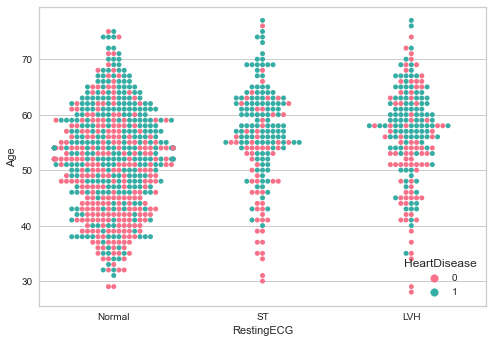

In [129]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=dataset, palette="husl")

In [130]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Replacing the nominal values with integer values.

In [131]:
dataset1 = pd.get_dummies(dataset, drop_first=True)
dataset1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


Train & Test Split

In [132]:
X = dataset1.drop(["HeartDisease"], axis=1)
y = dataset1["HeartDisease"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

15% is Train set and 85% is Test Set.

In [134]:
print(X_train.shape)
print(X_test.shape)


(780, 15)
(138, 15)


We need to tranform the data with MinMax Scaling to tranform the data.

In [135]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [136]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled


array([[0.34693878, 0.65      , 0.39303483, ..., 0.        , 0.        ,
        1.        ],
       [0.67346939, 0.55      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.625     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.36734694, 0.55      , 0.39137645, ..., 1.        , 1.        ,
        0.        ],
       [0.55102041, 0.6       , 0.3747927 , ..., 1.        , 0.        ,
        0.        ],
       [0.36734694, 0.525     , 0.33830846, ..., 0.        , 0.        ,
        1.        ]])

In [137]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled


array([[0.75510204, 0.72      , 0.51741294, ..., 1.        , 1.        ,
        0.        ],
       [0.63265306, 0.62      , 0.26533997, ..., 1.        , 1.        ,
        0.        ],
       [0.3877551 , 0.775     , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.57142857, 0.65      , 0.36650083, ..., 0.        , 0.        ,
        1.        ],
       [0.79591837, 0.625     , 0.4212272 , ..., 0.        , 1.        ,
        0.        ],
       [0.69387755, 0.65      , 0.43615257, ..., 0.        , 1.        ,
        0.        ]])

                                        1) Logistic Regression

In [138]:
log = LogisticRegression(random_state=101, solver='liblinear')
log.fit(X_train_scaled, y_train)

LogisticRegression(random_state=101, solver='liblinear')

In [139]:
y_pred = log.predict(X_test_scaled)
y_train_pred = log.predict(X_train_scaled)

Calculating F1 score, Accuracy and Recall.

In [140]:
log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)

[[51 11]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.86      0.92      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


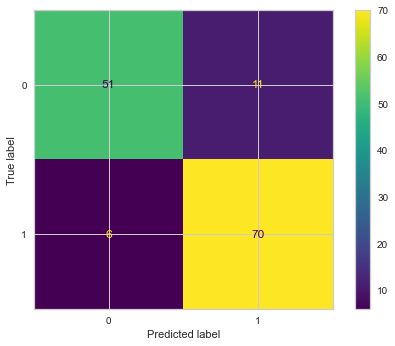

In [141]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


plot_confusion_matrix(log, X_test_scaled, y_test)


                                        2) Support Vector Machines

In [142]:
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)


In [143]:
svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)

[[54  8]
 [ 7 69]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        62
           1       0.90      0.91      0.90        76

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138

--------------------------------------------------------


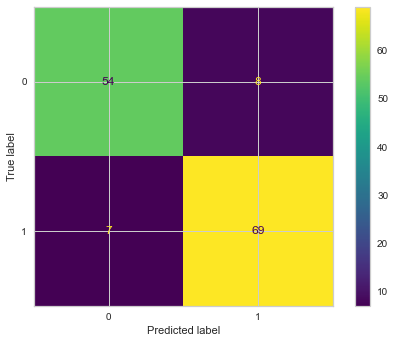

In [144]:
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test_scaled, y_test)


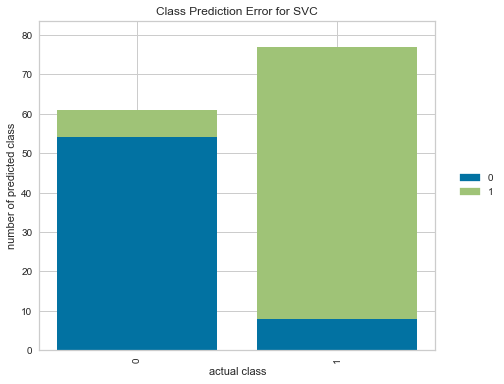

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [145]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(SVM_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof()


                                        3) Decision Tree

In [146]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)


In [147]:
dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)

[[43 19]
 [18 58]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.69      0.70        62
           1       0.75      0.76      0.76        76

    accuracy                           0.73       138
   macro avg       0.73      0.73      0.73       138
weighted avg       0.73      0.73      0.73       138

--------------------------------------------------------


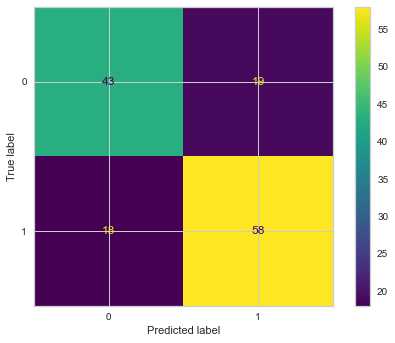

In [148]:
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test_scaled, y_test)



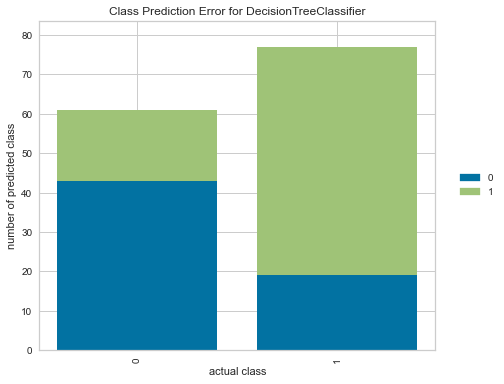

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [149]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof()

                                        4) Random Forest

In [150]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

[[53  9]
 [ 5 71]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        62
           1       0.89      0.93      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.89      0.90       138
weighted avg       0.90      0.90      0.90       138

--------------------------------------------------------


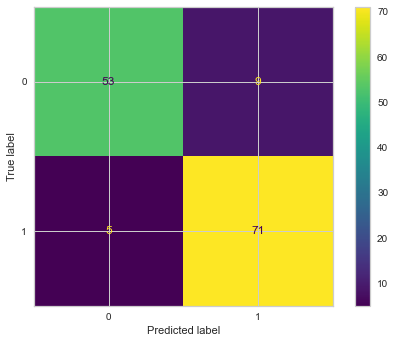

In [151]:
rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)


print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test_scaled, y_test)


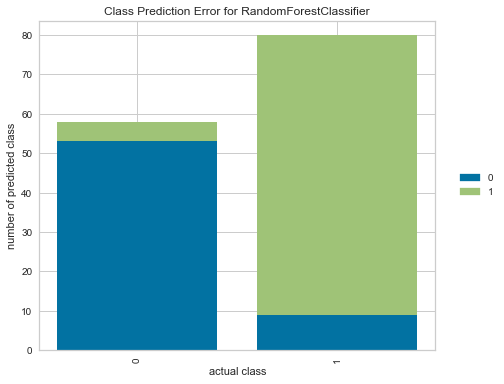

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [152]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof()

Finding the node with most importance in Random Forest.

In [153]:
RF_model.feature_importances_

array([0.09127286, 0.07379526, 0.10632464, 0.02535356, 0.1049907 ,
       0.11912291, 0.03670682, 0.03225268, 0.02561564, 0.01000144,
       0.01829766, 0.00932166, 0.09384744, 0.10801303, 0.14508368])

In [154]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp


,Feature Importance
ST_Slope_Up,0.145084
Oldpeak,0.119123
ST_Slope_Flat,0.108013
Cholesterol,0.106325
MaxHR,0.104991
ExerciseAngina_Y,0.093847
Age,0.091273
RestingBP,0.073795
Sex_M,0.036707
ChestPainType_ATA,0.032253


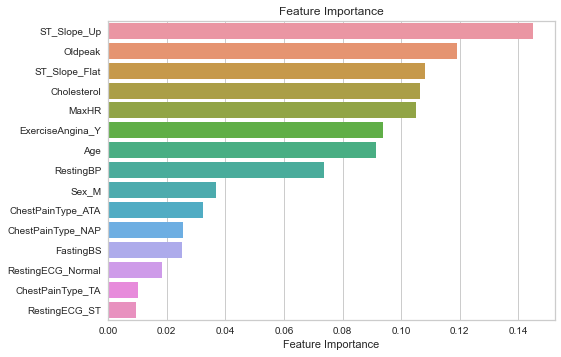

In [155]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

Node which matters the most is ST_Slope_UP

[Text(3031.0697115384614, 2189.5, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 488\nvalue = [386.638, 392.708]\nclass = 0'),
 Text(1993.389423076923, 2038.5, 'ChestPainType_ATA <= 0.5\ngini = 0.341\nsamples = 274\nvalue = [91.897, 330.417]\nclass = 0'),
 Text(1095.4326923076924, 1887.5, 'Sex_M <= 0.5\ngini = 0.3\nsamples = 249\nvalue = [70.603, 313.264]\nclass = 0'),
 Text(519.150641025641, 1736.5, 'Oldpeak <= 0.573\ngini = 0.496\nsamples = 36\nvalue = [23.534, 27.986]\nclass = 0'),
 Text(332.8525641025641, 1585.5, 'Oldpeak <= 0.256\ngini = 0.496\nsamples = 31\nvalue = [23.534, 19.861]\nclass = ['),
 Text(79.48717948717949, 1434.5, 'Cholesterol <= 0.337\ngini = 0.414\nsamples = 5\nvalue = [2.241, 5.417]\nclass = 0'),
 Text(39.743589743589745, 1283.5, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 2.708]\nclass = 0'),
 Text(119.23076923076923, 1283.5, 'RestingBP <= 0.638\ngini = 0.496\nsamples = 4\nvalue = [2.241, 2.708]\nclass = 0'),
 Text(79.48717948717949, 1132.5, 'gini = 0.0\nsamples = 1\nva

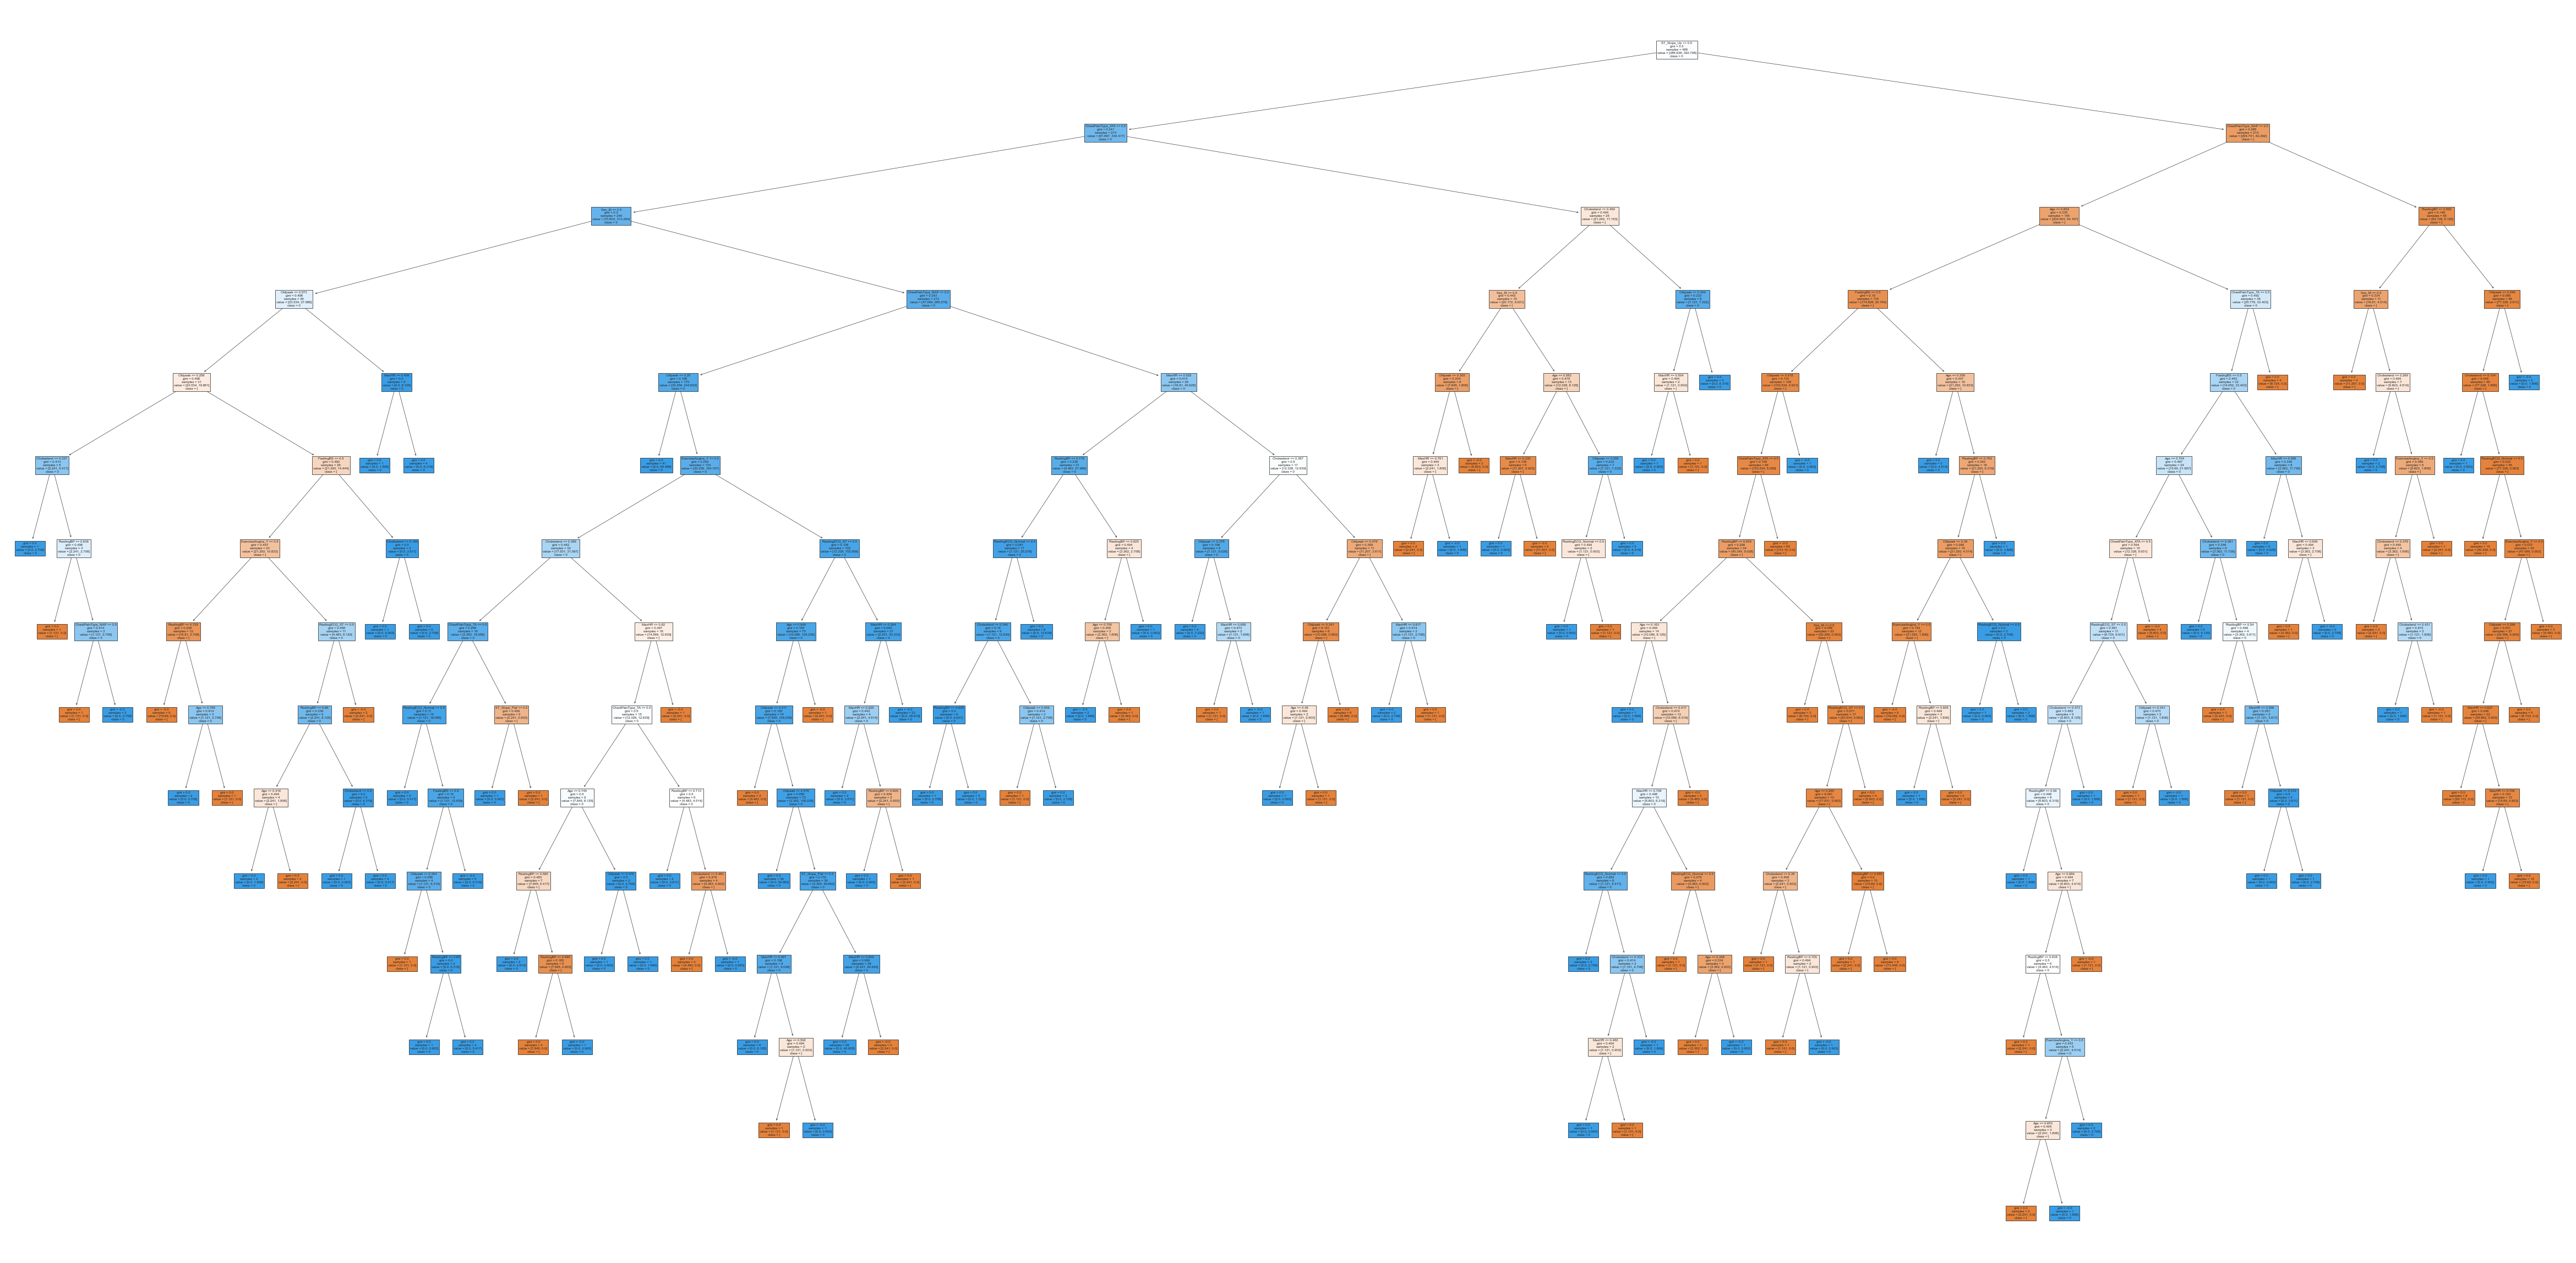

In [156]:
#printing the whole Random Forest
features = list(X.columns)
targets = str(dataset.HeartDisease.unique())
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (40,20), dpi=150)
plot_tree(RF_model.estimators_[0],
          feature_names = features,
          class_names=targets,
          filled = True)

                                        5) K Nearest Neighbors

In [157]:
KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

In [158]:
knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


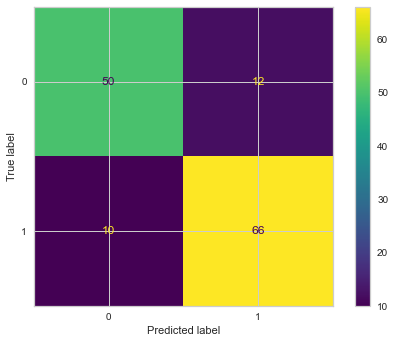

In [159]:
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)



Elbow method for finding Best Value for K.

In [160]:
#Elbow mwthod for choosing K
test_error_rates = []
for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [161]:
test_error_rates

[0.1594202898550725,
 0.2246376811594203,
 0.14492753623188404,
 0.16666666666666663,
 0.1594202898550725,
 0.16666666666666663,
 0.14492753623188404,
 0.14492753623188404,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898,
 0.1376811594202898,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.14492753623188404,
 0.13043478260869568,
 0.1376811594202898,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.1376811594202898,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898]

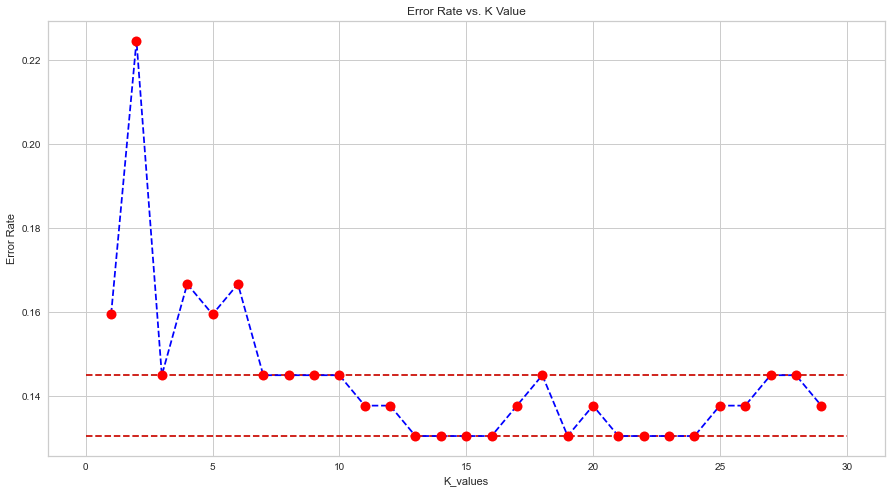

In [162]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14492753623188404, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13043478260869568, xmin=0, xmax=30, colors='r', linestyles="--")

In [163]:
# NOW WITH K=13
KNN_model = KNeighborsClassifier(n_neighbors=13, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)



In [164]:
knn13_f1 = f1_score(y_test, y_pred)
knn13_acc = accuracy_score(y_test, y_pred)
knn13_recall = recall_score(y_test, y_pred)

WITH K=13
-------------------
[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


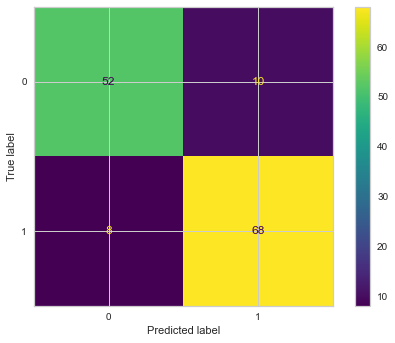

In [171]:
print('WITH K=13')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)


                                                COMPARISON

In [166]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest"],
                        "F1": [log_f1, svm_f1, knn_f1, dt_f1, rf_f1],
                        "Recall": [log_recall, svm_recall, knn_recall, dt_recall, rf_recall],
                        "Accuracy": [log_acc, svm_acc, knn_acc, dt_acc, rf_acc]
                        })


In [167]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    


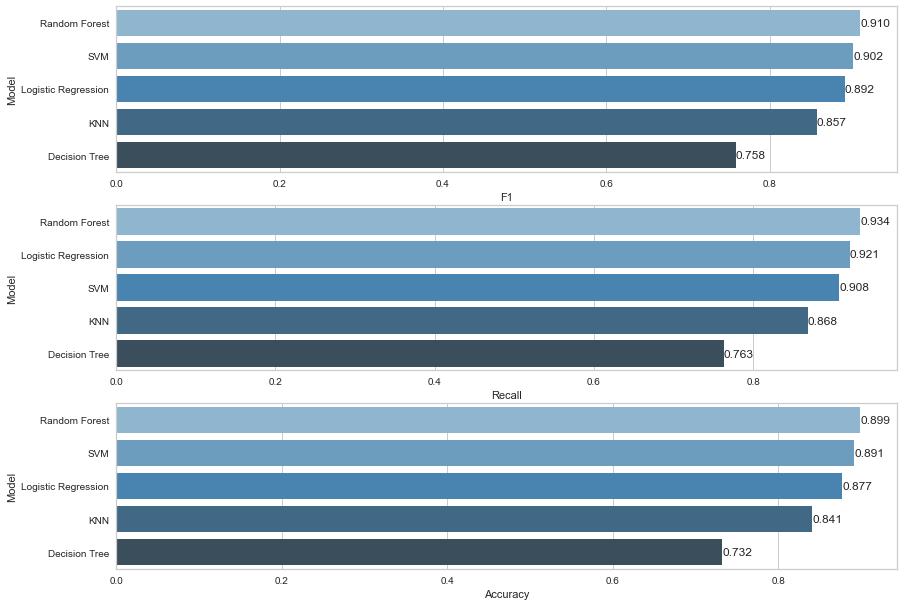

In [168]:
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)



                                                    CONCLUSION

In terms of Acccuracy and F1 score : 

1) Random Forest
2) Support Vector Machine
3) Logistic Regression
4) K Nearest Neighbors
5) Decision Tree


In terms of Recall :  

1) Random Forest 
2) Logistic Regression
3) Support Vector Machine
4) K Nearest Neighbors
5) Decision Tree 

In our study 'Random Forest' is the overall best perfroming algorithm and 'Decision Tree' is the worst performing.